# Exploratory Data Analysis

In [1]:
#importing the librarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the Dataset
df = pd.read_csv('data/zomato.csv')

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [4]:
#Duplicates
df.duplicated().sum()

#No duplicates in the dataset

0

In [5]:
#Shape of the dataset
df.shape

(45584, 20)

#### Observation:
- There are 45584 rows and 20 columns in the dataset
- Numerical - 9 and categorical - 11

In [6]:
#check NaN values

df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken_min                    0
dtype: int64

<Axes: >

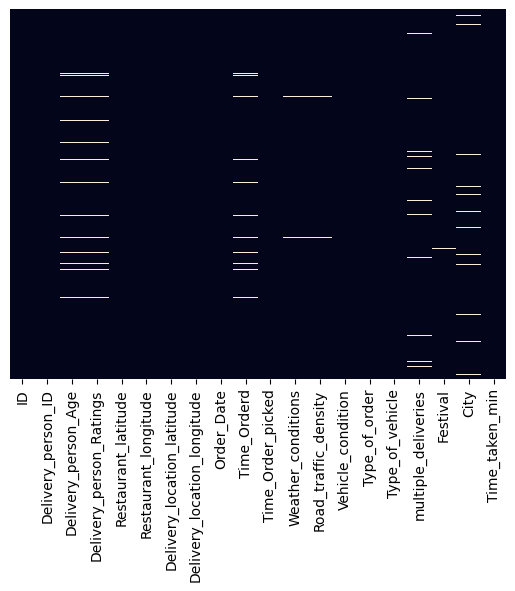

In [7]:
#checking null values using heatmap
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

#### Obseravtion:
- Delivery_person_Age ,Delivery_person_Ratings,Weather_conditions ,Road_traffic_density ,multiple_deliveries,Festival ,City has misssing values

#### categorical Features

In [8]:
#values count()
df['Type_of_order'].value_counts()

Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64

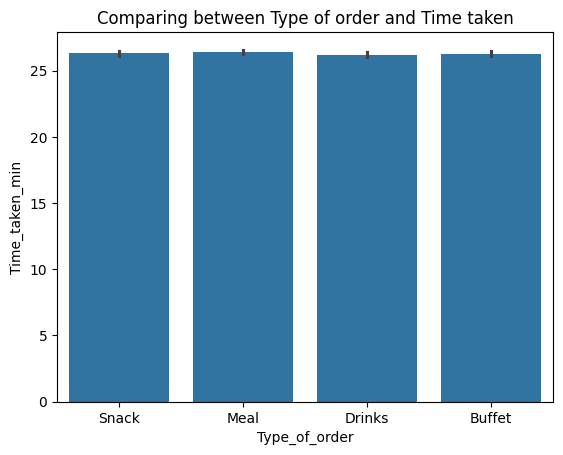

In [9]:
#comparing with target feature
plt.title('Comparing between Type of order and Time taken')
sns.barplot(df,x='Type_of_order',y='Time_taken_min')
plt.show()

#### Observatin:
- There is no difference in the time taken for type_of_order

In [10]:

df['Weather_conditions'].value_counts()


Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

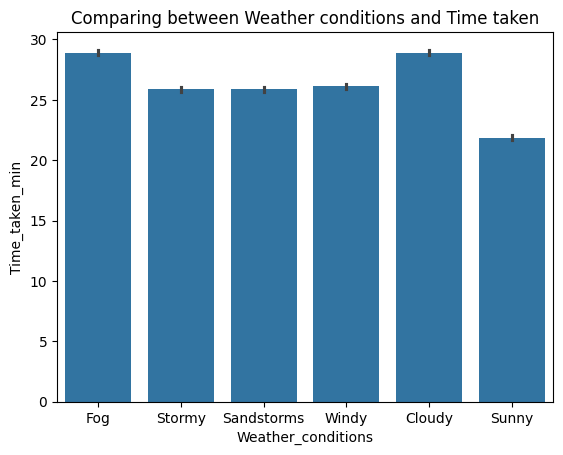

In [11]:
plt.title('Comparing between Weather conditions and Time taken')
sns.barplot(df,x='Weather_conditions',y='Time_taken_min')
plt.show()

#### Obseravtion:
- If the whaether is Sunny, we can expect early compared with all the wheather conditions.
- Fog and cloudy takes more time to deliver the order.

In [12]:
df['Festival'].value_counts()

Festival
No     44460
Yes      896
Name: count, dtype: int64

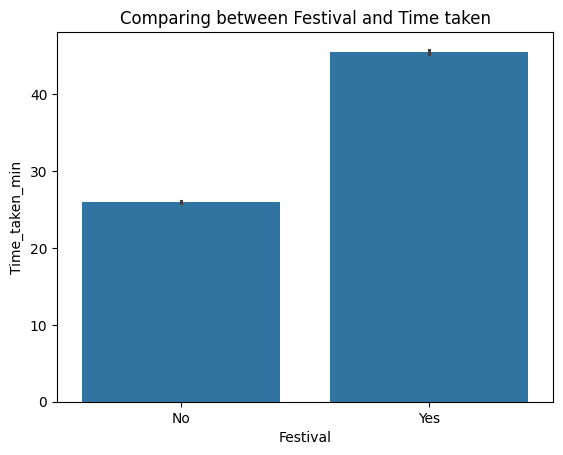

In [13]:
plt.title('Comparing between Festival and Time taken')
sns.barplot(df,x='Festival',y='Time_taken_min')
plt.show()

#### Obseravtion:
- If there is a festival more time taken for deliver.

In [14]:
df['City'].value_counts()

City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64

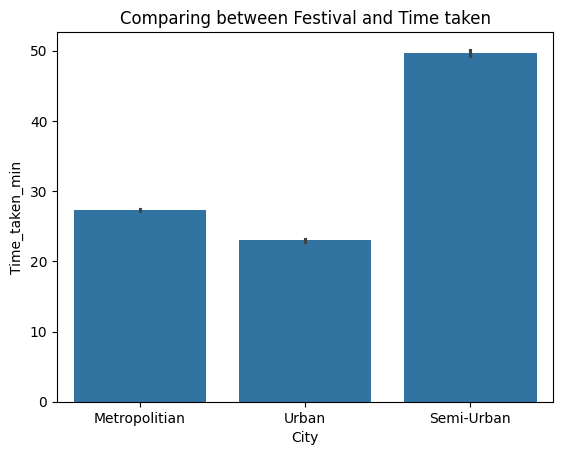

In [15]:
plt.title('Comparing between Festival and Time taken')
sns.barplot(data = df,x='City',y='Time_taken_min')
plt.show()

#### Observation:
- In Metropolitia,urban city takes less time compared with semi-urban

In [16]:
#Segregate Numerical and Categorical features

numerical_columns = df.select_dtypes(exclude='O').columns
categorical_columns = df.select_dtypes(include='O').columns

print('Numerical columns:',numerical_columns)
print('categorical columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken_min'],
      dtype='object')
categorical columns: Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [17]:
df[categorical_columns].describe().T

,count,unique,top,freq
ID,45584,45584,0xcdcd,1
Delivery_person_ID,45584,1320,JAPRES11DEL02,67
Order_Date,45584,44,15-03-2022,1192
Time_Orderd,43853,176,21:55,461
Time_Order_picked,45584,193,21:30,495
Weather_conditions,44968,6,Fog,7653
Road_traffic_density,44983,4,Low,15476
Type_of_order,45584,4,Snack,11530
Type_of_vehicle,45584,4,motorcycle,26429
Festival,45356,2,No,44460


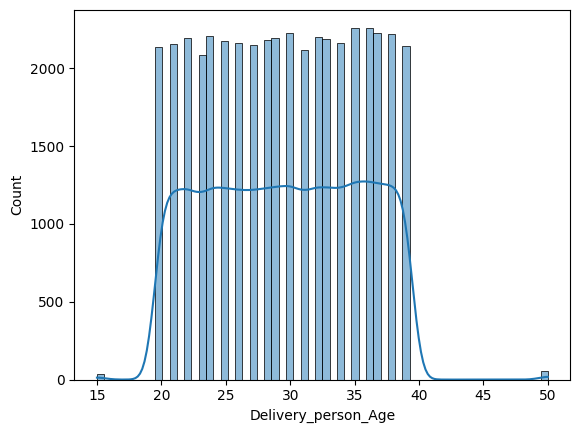

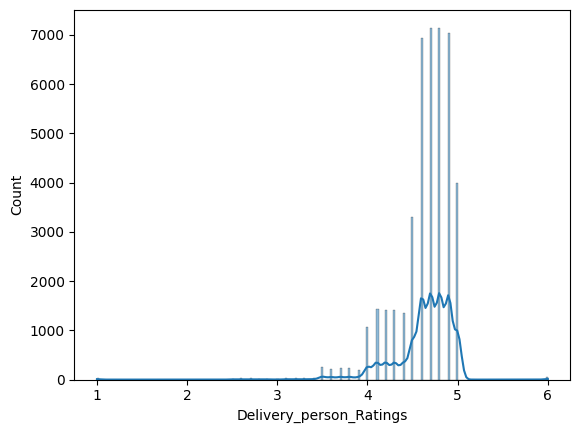

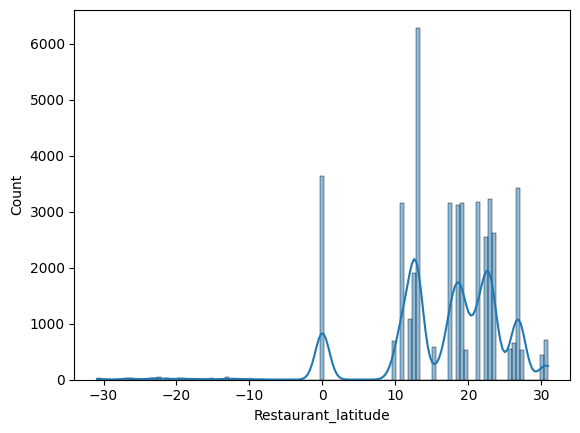

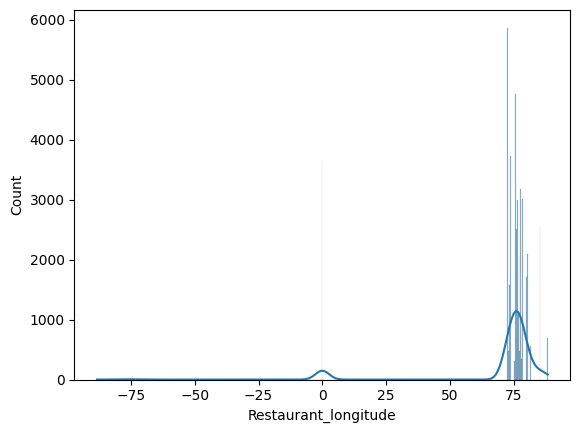

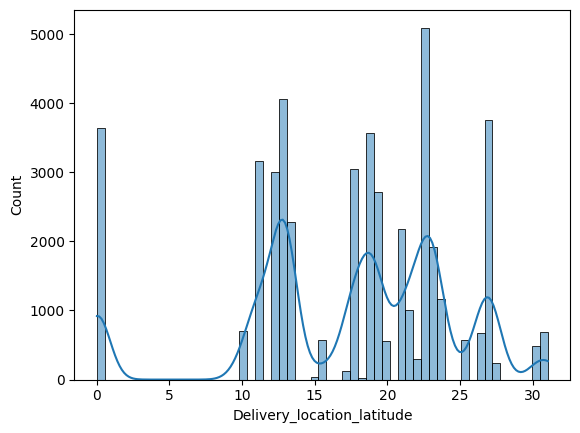

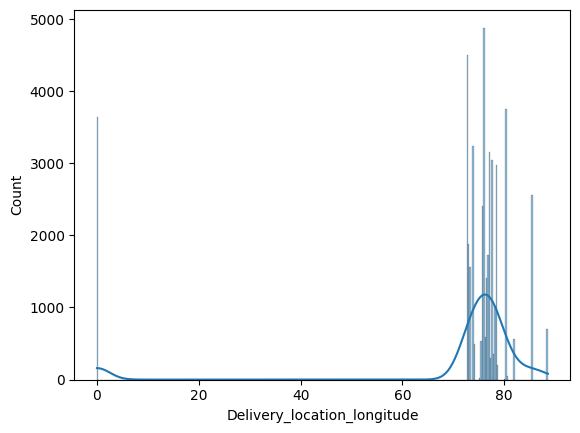

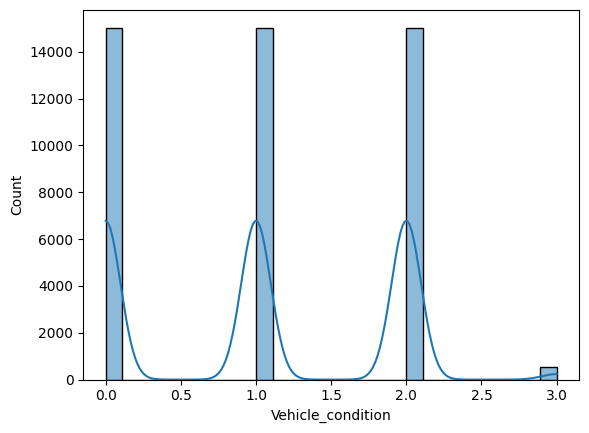

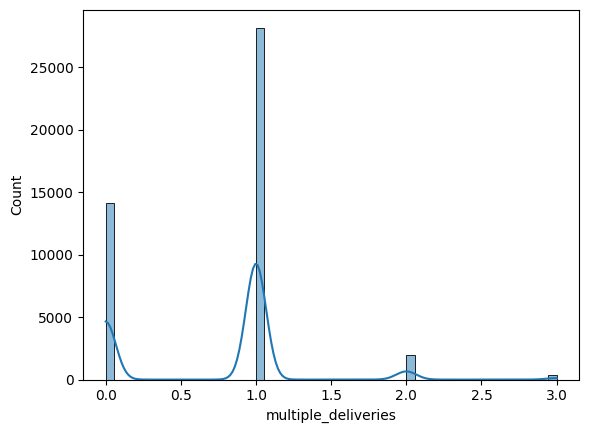

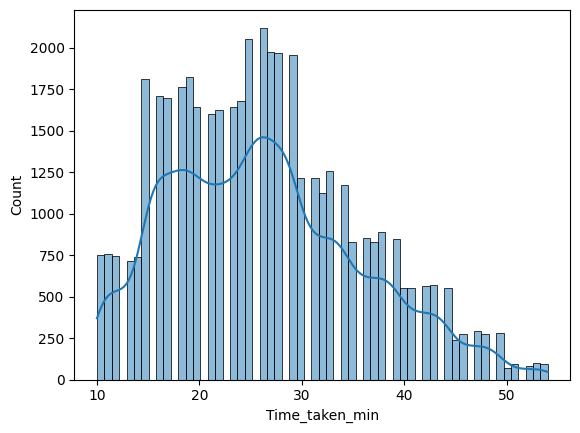

In [18]:
#Distribution of Numerical columns

for i in numerical_columns:
   sns.histplot(df,x=i,kde=True)
   print('\n')
   plt.show()

#### Observation:
- Average Time takem is 20-40 minutes.
- In multiple Deliveries Singledelivery has maximum order count.

In [19]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [50]:
#Calculating Distance Logitude and Latitude 

# Earth radius (km)
# R=6371

#convert degree to radius

# def convert_degree_to_radius(degree):
#    return degree * (np.pi/180)

# #Calculating distance bt two points using haversine formula

# def calculate_distance(lat1, lon1, lat2, lon2):
#    d_lat = convert_degree_to_radius(lat2 - lat1)
#    d_lon = convert_degree_to_radius(lon2 - lon1)
#    a = np.sin(d_lat/2)**2 + np.cos(convert_degree_to_radius(lat1)) *np.cos(convert_degree_to_radius(lat2))* np.sin(d_lon/2)**2
#    c= 2 * np.arctan2(np.sqrt(a) , np.sqrt(1-a))
#    return R * c

# #calculate the distance between each point
# df['distance'] = np.nan

# for i in range(len(df)):
#    df.loc[i , 'distance'] = calculate_distance( df.loc[i , 'Restaurant_latitude'],
#                                                df.loc[i,'Restaurant_longitude'],
#                                                df.loc[i,'Delivery_location_latitude'],
#                                                df.loc[i,'Delivery_location_longitude'])

In [20]:
#We can calculate the distance using geopy library

#pip install geopy 

from geopy.distance import geodesic

for i in range(len(df)):
   df.loc[i,'Distance'] = geodesic((df.loc[i,'Restaurant_latitude'],
                                    df.loc[i,'Restaurant_longitude']),
                                    (df.loc[i,'Delivery_location_latitude'],
                                    df.loc[i,'Delivery_location_longitude'])).km

In [21]:
df.head()
#Distance colmn is added we can drop log and lat 

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min,Distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


In [22]:
#Delievery person ID and Delivery ID also not paly any imp role we can drop that as well

df.drop(labels=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude',
                'Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)

In [23]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min,Distance
0,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795
4,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


### Feature Engineering

In [24]:
#Make all the cat to num
#Order_Date column

df['Day'] = df['Order_Date'].str.split('-').str[0]
df['Month'] = df['Order_Date'].str.split('-').str[1]
df['Year'] = df['Order_Date'].str.split('-').str[2]

In [25]:
df.drop('Order_Date',axis=1,inplace=True)

In [39]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [26]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min,Distance,Day,Month,Year
0,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,12,02,2022
1,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,13,02,2022
2,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,04,03,2022
3,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795,13,02,2022
4,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,14,02,2022


In [27]:
# Time_Order
df['Order_Hours'] = df['Time_Orderd'].str.split(':').str[0]
df['Order_Min'] = df['Time_Orderd'].str.split(':').str[1]
df.drop(labels=['Time_Orderd'],axis=1,inplace=True)

In [28]:
#Time_Order_picked

df['Picked_Hours'] = df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min'] = df['Time_Order_picked'].str.split(':').str[1]
df.drop(labels=['Time_Order_picked'],axis=1,inplace=True)

0        55
1        55
2        30
3        20
4        50
         ..
45579    35
45580    55
45581    50
45582    35
45583    10
Name: Order_Min, Length: 45584, dtype: object

In [34]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min,Distance,Day,Month,Year,Order_Hours,Order_Min,Picked_Hours,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,12,02,2022,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,13,02,2022,14,55,15,05
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,04,03,2022,17,30,17,40
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795,13,02,2022,09,20,09,30
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,14,02,2022,19,50,20,05


## Feature Engineering

In [37]:
df.isnull().sum()

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Weather_conditions          616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken_min                0
Distance                      0
Day                           0
Month                         0
Year                          0
Order_Hours                1731
Order_Min                  5799
Picked_Hours                  0
Picked_Min                 4127
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43730 non-null  float64
 1   Delivery_person_Ratings  43676 non-null  float64
 2   Weather_conditions       44968 non-null  object 
 3   Road_traffic_density     44983 non-null  object 
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_order            45584 non-null  object 
 6   Type_of_vehicle          45584 non-null  object 
 7   multiple_deliveries      44591 non-null  float64
 8   Festival                 45356 non-null  object 
 9   City                     44384 non-null  object 
 10  Time_taken_min           45584 non-null  int64  
 11  Distance                 45584 non-null  float64
 12  Day                      45584 non-null  int32  
 13  Month                    45584 non-null  int32  
 14  Year                  

In [49]:
col_with_nan_num = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Order_Hours'
                    ,'Order_Min','Picked_Hours','Picked_Min']

for col in col_with_nan_num:
   df[col].fillna(df[col].median(),inplace=True)

In [52]:
col_with_nan_cat = ['Weather_conditions','Road_traffic_density','Festival','City']

for col in col_with_nan_cat:
   df[col].fillna(df[col].mode()[0],inplace=True)

In [53]:
df.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken_min             0
Distance                   0
Day                        0
Month                      0
Year                       0
Order_Hours                0
Order_Min                  0
Picked_Hours               0
Picked_Min                 0
dtype: int64

In [54]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min,Distance,Day,Month,Year,Order_Hours,Order_Min,Picked_Hours,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,12,2,2022,21.0,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,13,2,2022,14.0,55,15,05
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,4,3,2022,17.0,30,17,40
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795,13,2,2022,9.0,20,09,30
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,14,2,2022,19.0,50,20,05


In [57]:
df.to_csv('cleaned_data.csv')

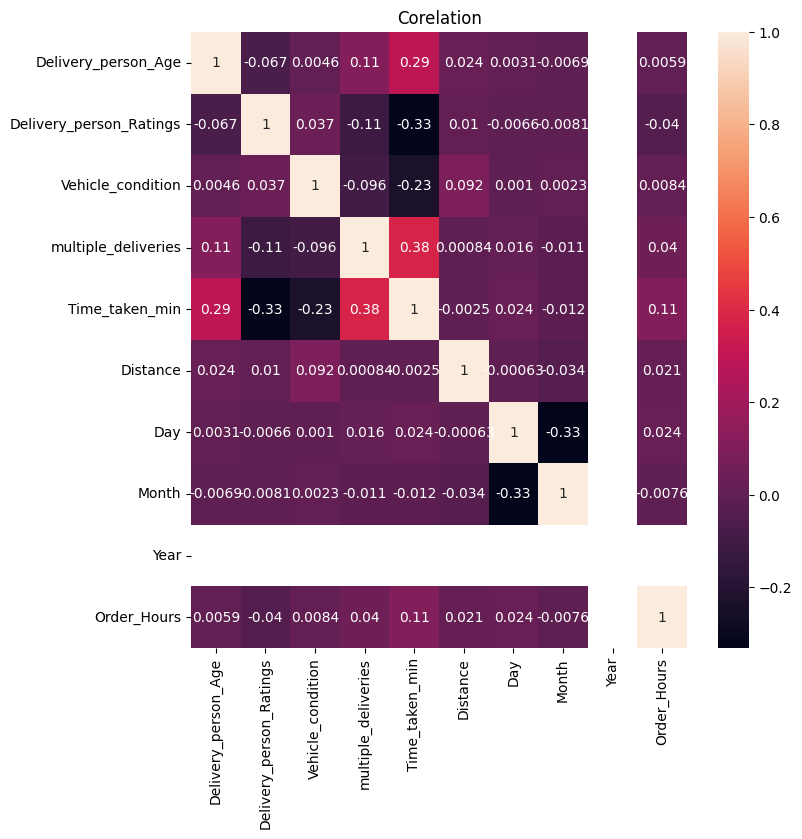

In [56]:
#Corelation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Corelation')
plt.show()

In [ ]:
# we can drop year 